In [88]:
#regression fitting higher order curves
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [89]:
random.seed(98103)

In [121]:
#number of samples
n=30
degree=4

In [122]:
x=[random.random() for i in range(n)]
x=sorted(x)
x=np.array(x,dtype=np.float32)
print(x)

[0.17414556 0.20016074 0.21813476 0.24102303 0.24532935 0.30309615
 0.31314608 0.31634772 0.3198078  0.39413828 0.44577813 0.45873886
 0.462591   0.48443237 0.48935062 0.53613806 0.5362592  0.5381135
 0.5590075  0.58118665 0.59229046 0.5944881  0.63549596 0.7236447
 0.75299466 0.7597269  0.78062963 0.8241077  0.9053009  0.95148647]


In [123]:
y=np.sin(4*x)
print(y)

[ 0.6415999   0.7178039   0.76596373  0.82153165  0.83123046  0.93645513
  0.9497963   0.9537251   0.95779514  0.99998343  0.97754544  0.9653124
  0.96117485  0.933432    0.9261941   0.83986825  0.83960515  0.8355531
  0.7867725   0.7289905   0.6978783   0.6915555   0.5643196   0.24450965
  0.12925142  0.10250476  0.01907296 -0.15422021 -0.4614341  -0.61655   ]


In [124]:
random.seed(1)
e=[random.gauss(0,1.0/3.0) for i in range(n)]
y=y+e
y=np.array(y,dtype=np.float32)
print(y)

[ 1.0709949   1.2009524   0.7880757   0.56668377  0.4671727   0.94689995
  0.6090953   0.47478196  1.0242325   1.0444416   1.1597016   0.66065544
  0.9628433   0.9118514   0.42425108  1.0192007   0.9465088   1.6319238
  0.8544289   0.6807564   1.1087973   0.75781924  0.86732996  0.12266156
  0.20197536  0.44393432  0.2511553  -0.11139613 -0.82220346 -0.46814278]


In [125]:
def poly_feature(x,degree):
    df=pd.DataFrame()
    for i in range(degree+1):
        df['X'+str(i)]=x**i
    return df

In [126]:
df=poly_feature(x,degree)
print(df)

     X0        X1        X2        X3        X4
0   1.0  0.174146  0.030327  0.005281  0.000920
1   1.0  0.200161  0.040064  0.008019  0.001605
2   1.0  0.218135  0.047583  0.010379  0.002264
3   1.0  0.241023  0.058092  0.014002  0.003375
4   1.0  0.245329  0.060186  0.014766  0.003622
5   1.0  0.303096  0.091867  0.027845  0.008440
6   1.0  0.313146  0.098060  0.030707  0.009616
7   1.0  0.316348  0.100076  0.031659  0.010015
8   1.0  0.319808  0.102277  0.032709  0.010461
9   1.0  0.394138  0.155345  0.061227  0.024132
10  1.0  0.445778  0.198718  0.088584  0.039489
11  1.0  0.458739  0.210441  0.096538  0.044286
12  1.0  0.462591  0.213990  0.098990  0.045792
13  1.0  0.484432  0.234675  0.113684  0.055072
14  1.0  0.489351  0.239464  0.117182  0.057343
15  1.0  0.536138  0.287444  0.154110  0.082624
16  1.0  0.536259  0.287574  0.154214  0.082699
17  1.0  0.538113  0.289566  0.155819  0.083849
18  1.0  0.559008  0.312489  0.174684  0.097650
19  1.0  0.581187  0.337778  0.196312  0

In [127]:
X=np.array(df)

In [128]:
def regression(X,y):
    row,col=np.shape(X)
    w=[random.random() for i in range(col)]
    w=np.array(w)
    y_predicted=np.dot(X,w)
    var=y-y_predicted
    loss=np.dot(var,var.T)/2*row

    learning_rate=0.001
    epochs=0
    loss_curve=[loss]

    while(loss>10 and epochs<50000):
        for i in range(col):
            partialloss=np.array([0 for j in range(col)])
            #gradient descent algorithm
            for j in range(row):
                partialloss=partialloss+X[j]*(y[j]-y_predicted[j])
            partialloss=partialloss/row
            w=w+learning_rate*partialloss
    
        #updating y_predicted values and hence finding loss
        y_predicted=np.dot(X,w)
        var=y-y_predicted
        loss=np.dot(var,var.T)/2*row
        loss_curve.append(loss)
        epochs=epochs+1

    return w,loss_curve

Final w: [ 0.70314335  0.88836934 -0.26818234 -0.91413053 -1.53505927]


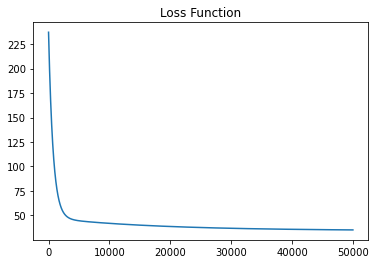

In [129]:
w,loss_curve=regression(X,y)

print('Final w:',w)
plt.plot(loss_curve)
plt.title("Loss Function")
plt.autoscale()
plt.show()

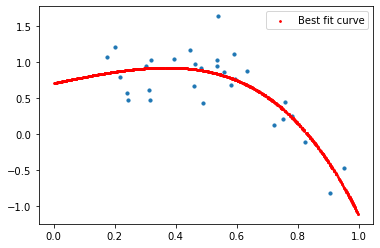

In [130]:
#plotting curve
x_values=[random.random() for i in range(1000)]
x_values=np.array(x_values,dtype=np.float32)
random_df=poly_feature(x_values,degree)
random_df=np.array(random_df)

# Calculate corresponding y values for the curve
y_values = np.dot(random_df,w)

plt.scatter(X[:,1],y,s=10)
plt.scatter(x_values, y_values, label='Best fit curve',color='red',s=3)
plt.legend()
plt.autoscale()